# Validación de modelos de regresión

El propoósito de este modelo es ver como la complejidad de un modelo afecta a las medidas de performance, y cómo elegir modelos con un ajuste adecuado.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_regression

## Data Manipulation

Haremos un dataset de juguete para probar, donde haya una relación lineal entre los atributos de entrada (at1, at2, at3, at4) y la variable objetivo (Target)

In [2]:
X, y = make_regression(300, n_features=4, bias=10)
X = X*10
y = y*10
df = pd.DataFrame(X, columns=['at1', 'at2', 'at3', 'at4'])
df['target'] = y

df.head()

,at1,at2,at3,at4,target
0,0.384528,13.519051,-3.960125,3.348649,39.628294
1,-1.920667,-3.324121,27.692235,-0.411925,1306.784799
2,-6.224192,0.281677,15.864231,-6.104478,293.445213
3,-0.595934,3.664943,-16.117227,11.459331,-737.480477
4,-6.299424,-21.832611,14.413419,10.108683,79.545943


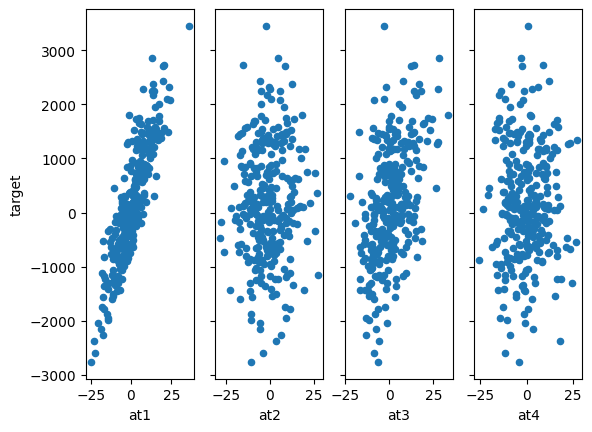

In [3]:
# Creamos una estructura para los subplots.
fig, axs = plt.subplots(1, 4, sharey='row')

#Agregamos un scatterplot para cada atributo.
for i in range(4):
    df.plot(x= f'at{i+1}', y='target', kind='scatter', ax=axs[i])

### Modelado
Vamos a generar tres modelos, en complejidad creciente, para modelar la relación entre los atributos de entrada y la variable objetivo (target)

Nuestro objetivo es predecir el valor del target en función de los predictores, y los modelos elegidos son:

1. Función lineal simple
2. Función lineal múltiple
3. Árbol de regresión (modelo no lineal, similar al árbol de clasificación, pero para predecir valores numéricos.)

Evaluaremos el sesgo (bias) y la varianza en cada caso, y compararemos.

# Regresión lineal simple

La clase pasada vimos como hacerlo, por lo que no profundizaremos en los detalles.

In [4]:
# Importamos el regresor lineal
from sklearn.linear_model import LinearRegression
# Importamos el regresor basado en árboles.
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae

## Regresor lineal simple

Haremos un modelo que solo dependa linealmente de una variable: at1, la complejidad de este modelo es muy baja.

In [5]:
simple_linear_model = LinearRegression(n_jobs= -1,  copy_X= False)

Creamos nuestro conjunto de datos de entrada:

X: datos de entrada, equivalente a la columna TV
sales: columna objetivo, a predecir

In [6]:
X = df['at1'].to_numpy();
target = df['target'].to_numpy();

Ahora, haremos lo siguiente: iteraremos 10 veces. En cada iteración, vamos a dividir el conjunto de datos en 2, donde el primer subconjunto tendrá el 80% de los datos y el segundo el 20% restante.

Esto simulará cross validation con selección aleatoria.

Este conjunto más chico será utilizado para medir que tan bueno es el modelo para predecir datos que no se conocen de antemano.

In [7]:
dict_results = {
    'error_de_entrenamiento': [],
    'error_de_prueba': []
}
# Por cada iteración
for i in range(10):
  # Voy a dividir el conjunto de datos en dos, de manera aleatoria
  X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2)
  # Entreno el modelo con los datos de entrenamiento
  simple_linear_model.fit(X_train.reshape(-1,1), y_train)
  # Calculo el error contra los mismos datos de entrenamiento
  y_predict = simple_linear_model.predict(X_train.reshape(-1,1))
  error_entrenamiento = mae(y_train, y_predict)
  dict_results['error_de_entrenamiento'].append(error_entrenamiento)
  # Calculo el error contra los datos de prueba
  y_predict = simple_linear_model.predict(X_test.reshape(-1,1))
  error_prueba = mae(y_test, y_predict)
  dict_results['error_de_prueba'].append(error_prueba)


# Haremos un dataframe con estos valores

df_errores_funcion_lineal_simple = pd.DataFrame(dict_results)
df_errores_funcion_lineal_simple

,error_de_entrenamiento,error_de_prueba
0,413.971677,356.268199
1,395.702618,422.183006
2,386.198019,447.236899
3,388.714446,451.132788
4,399.562965,396.827994
5,412.770819,353.994155
6,383.586188,476.714495
7,403.221299,387.362569
8,414.856098,344.488801
9,406.317870,368.450045


In [8]:
print(f'El error promedio en el entrenamiento es {round(df_errores_funcion_lineal_simple["error_de_entrenamiento"].mean(), 3)}')
print(f'El error de prueba es {round(df_errores_funcion_lineal_simple["error_de_prueba"].mean(), 3)} +/- {round(df_errores_funcion_lineal_simple["error_de_prueba"].std(), 3)}')

El error promedio en el entrenamiento es 400.49
El error de prueba es 400.466 +/- 46.543


Presten atención a los valores anteriores, y compárenlos con los que obtendrán mas adelante.

## Regresor lineal múltiple

Repetiremos todos los pasos

In [9]:
multiple_linear_model = LinearRegression(n_jobs= -1,  copy_X= False)

X = df[['at1', 'at2', 'at3', 'at4']].to_numpy();
target = df['target'].to_numpy();

In [10]:
dict_results = {
    'error_de_entrenamiento': [],
    'error_de_prueba': []
}
# Por cada iteración
for i in range(10):
  # Voy a dividir el conjunto de datos en dos, de manera aleatoria
  X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2)
  # Entreno el modelo con los datos de entrenamiento
  multiple_linear_model.fit(X_train, y_train)
  # Calculo el error contra los mismos datos de entrenamiento
  y_predict = multiple_linear_model.predict(X_train)
  error_entrenamiento = mae(y_train, y_predict)
  dict_results['error_de_entrenamiento'].append(error_entrenamiento)
  # Calculo el error contra los datos de prueba
  y_predict = multiple_linear_model.predict(X_test)
  error_prueba = mae(y_test, y_predict)
  dict_results['error_de_prueba'].append(error_prueba)


# Haremos un dataframe con estos valores

df_errores_funcion_lineal_multiple = pd.DataFrame(dict_results)
df_errores_funcion_lineal_multiple

,error_de_entrenamiento,error_de_prueba
0,51.359361,5.011695e-13
1,61.394180,1.991888e-13
2,126.463787,2.193209e-13
3,79.822066,1.871096e-13
4,30.476855,2.825592e-13
5,68.568098,1.235397e-12
6,38.956094,4.073186e-13
7,105.242970,2.861119e-13
8,103.468961,2.512361e-13
9,66.830386,4.275691e-13


In [11]:
print(f'El error promedio en el entrenamiento es {round(df_errores_funcion_lineal_multiple["error_de_entrenamiento"].mean(),3)}')
print(f'El error de prueba es {round(df_errores_funcion_lineal_multiple["error_de_prueba"].mean(),3)} +/- {round(df_errores_funcion_lineal_multiple["error_de_prueba"].std(),3)}')

El error promedio en el entrenamiento es 73.258
El error de prueba es 0.0 +/- 0.0


## Arbol de regresión

In [12]:
tree_model = DecisionTreeRegressor(max_depth=10)

X = df[['at1', 'at2', 'at3', 'at4']].to_numpy();
target = df['target'].to_numpy();

In [13]:
dict_results = {
    'error_de_entrenamiento': [],
    'error_de_prueba': []
}
# Por cada iteración
for i in range(10):
  # Voy a dividir el conjunto de datos en dos, de manera aleatoria
  X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2)
  # Entreno el modelo con los datos de entrenamiento
  tree_model.fit(X_train, y_train)
  # Calculo el error contra los mismos datos de entrenamiento
  y_predict = tree_model.predict(X_train)
  error_entrenamiento = mae(y_train, y_predict)
  dict_results['error_de_entrenamiento'].append(error_entrenamiento)
  # Calculo el error contra los datos de prueba
  y_predict = tree_model.predict(X_test)
  error_prueba = mae(y_test, y_predict)
  dict_results['error_de_prueba'].append(error_prueba)


# Haremos un dataframe con estos valores

df_errores_arbol = pd.DataFrame(dict_results)
df_errores_arbol

,error_de_entrenamiento,error_de_prueba
0,2.502150,189.193208
1,2.349474,172.086803
2,3.188087,204.938939
3,2.423836,193.210780
4,4.045623,195.745449
5,1.767549,196.439597
6,2.002742,156.817260
7,3.607321,197.869192
8,4.387394,261.289784
9,3.345740,210.508781


In [14]:
print(f'El error promedio en el entrenamiento es {round(df_errores_arbol["error_de_entrenamiento"].mean(),3)}')
print(f'El error de prueba es {round(df_errores_arbol["error_de_prueba"].mean(),3)} +/- {round(df_errores_arbol["error_de_prueba"].std(),3)}')

El error promedio en el entrenamiento es 2.962
El error de prueba es 197.81 +/- 27.255


#Comparemos

<Axes: >

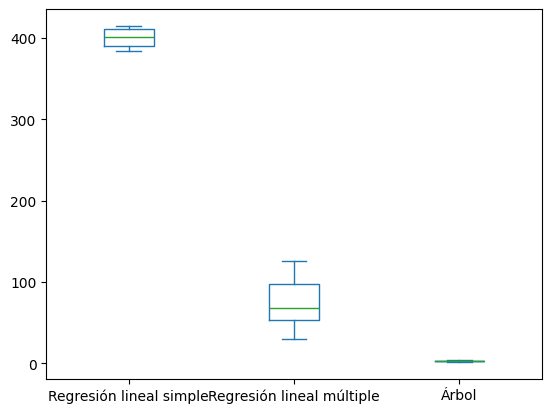

In [15]:
errores_entrenamiento = pd.DataFrame({
    'Regresión lineal simple': df_errores_funcion_lineal_simple['error_de_entrenamiento'],
    'Regresión lineal múltiple': df_errores_funcion_lineal_multiple['error_de_entrenamiento'],
    'Árbol': df_errores_arbol['error_de_entrenamiento'],
})

errores_entrenamiento.plot(kind='box')

<Axes: >

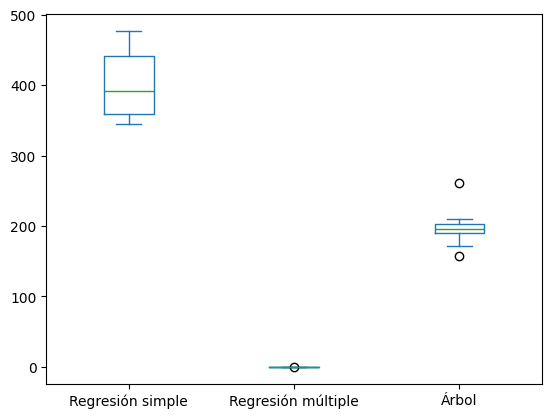

In [16]:
errores_prueba = pd.DataFrame({
    'Regresión simple': df_errores_funcion_lineal_simple['error_de_prueba'],
    'Regresión múltiple': df_errores_funcion_lineal_multiple['error_de_prueba'],
    'Árbol': df_errores_arbol['error_de_prueba'],
})

errores_prueba.plot(kind='box')

Noten como el árbol de decisión es demasiado complejo, se la rebusca mucho para modelar el problema, entonces se adapta muy bien a los datos de entrenamiento, pero muy mal a los datos de prueba.

Miren el árbol resultante:

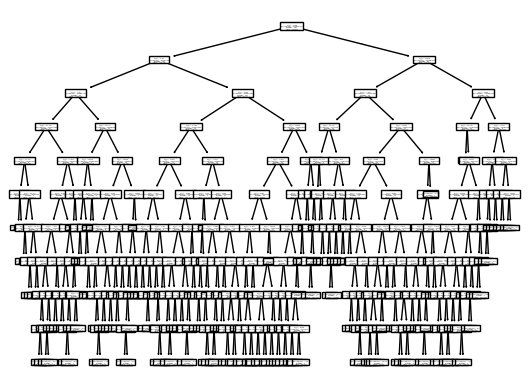

In [17]:
from sklearn.tree import plot_tree

plot_tree(tree_model);

Cuando el modelo es muy complejo para el problema a modelar, entonces, aprende muy bien como adaptarse al conjunto de datos de entrenamiento, pero no generaliza, por tanto no predice bien los datos de prueba.

En este caso, lo vemos porque hay una varianza más alta y el error también es más alto. Este fenómeno se llama Overfitting.

En cambio, cuando el modelo es demasiado simple, como una función lineal simple que solo usa un atributo de entrada, el bias o error en el entrenamiento es bajo, por lo tanto también lo será en las pruebas. Este fenómeno es Underfitting\

La función más adecuada para modelar entonces el problema es:

In [18]:
atts = ['at1', 'at2', 'at3', 'at4']
linear_comb = ' + '.join([f'{round(multiple_linear_model.coef_[i], 3)} x {atts[i]}' for i in range(len(atts))])
print(f'f(at1,at2,at3,at4) = {linear_comb } + {round(multiple_linear_model.intercept_, 3)}')

f(at1,at2,at3,at4) = 98.197 x at1 + 7.314 x at2 + 51.294 x at3 + 1.829 x at4 + 100.0
